In [1]:
# read in data and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [2]:
# read in data
df = pd.read_csv('CS_DATA_ADJ.csv')

In [10]:
#import bamboolib as bam

In [4]:
df1 = df.loc[((df['Year'] == 2016) | (df['Year'] == 2015)) | (df['Year'] == 2019) | (df['Year'] == 2018) | (df['Year'] == 2017)]

In [5]:
df1.describe()

,Mkt_Cap,Year,St_Sc_2021,St_Sc_2019,St_Sc_R_2021,St_Sc_R_2019,FWD_Return_136M_Class,FWD_Return_1M,FWD_Return_1M_REL,FWD_Return_1M_Class,FWD_Return_3M,FWD_Return_3M_REL,FWD_Return_3M_Class,FWD_Return_6M,FWD_Return_6M_REL,FWD_Return_6M_Class,FWD_EPS_3M,FWD_EPS_3M_REL,FWD_EPS_3M_REL_Decile,FWD_EPS_GR_3M_REV,FWD_EPS_GR_3M_REV_REL,FWD_EPS_GR_3M_REV_REL_Decile,FWD_REV_3M,FWD_REV_3M_REL,FWD_REV_3M_REL_Decile,FWD_REV_GR_3M_REV,FWD_REV_GR_3M_REV_REL,FWD_REV_GR_3M_REV_REL_Decile,FWD_FPE_3M_Rev,FWD_FPE_3M_Rev_REL,FWD_FPE_3M_Rev_REL_Decile,FWD_DY_3M_Rev,FWD_DY_3M_Rev_REL,FWD_DY_3M_Rev_REL_Decile,FWD_PB_3M_Rev,FWD_PB_3M_Rev_REL,FWD_PB_3M_Rev_REL_Decile,FWD_EVS_3M_Rev,FWD_EVS_3M_Rev_REL,FWD_EVS_3M_Rev_REL_Decile,An_Mark_6M_REL,An_Mark_6M,An_Mark_3M_REL,An_Mark_3M,An_Mark_REL,An_Mark,An_Unch_6M_REL,An_Unch_6M,An_Unch_3M_REL,An_Unch_3M,An_Unch_REL,An_Unch,An_Down_6M_REL,An_Down_6M,An_Down_3M_REL,An_Down_3M,An_Down_REL,An_Down,An_Up_6M_REL,An_Up_6M,An_Up_3M_REL,An_Up_3M,An_Up_REL,An_Up,NRR_6M_REL,NRR_6M,NRR_3M_REL,NRR_3M,NRR_REL,NRR,GP_EV_CV_REL,GP_EV_CV,GP_EV_1Y_Chg_REL,GP_EV_1Y_Chg,GP_EV_REL,GP_EV,EBITDA_Mgn_CV_REL,EBITDA_Mgn_CV,EBITDA_Mgn_1Y_Chg_REL,EBITDA_Mgn_1Y_Chg,EBITDA_Mgn_REL,EBITDA_Mgn,Op_Mgn_CV_REL,Op_Mgn_CV,Op_Mgn_1Y_Chg_REL,Op_Mgn_1Y_Chg,Op_Mgn_REL,Op_Mgn,FCF_Mgn_CV_REL,FCF_Mgn_CV,FCF_Mgn_1Y_Chg_REL,FCF_Mgn_1Y_Chg,FCF_Mgn_REL,FCF_Mgn,ROE_CV_REL,ROE_CV,ROE_1Y_Chg_REL,ROE_1Y_Chg,ROE_REL,ROE,ROIC_CV_REL,ROIC_CV,EPS_Stab_Sc_1Y_REL,EPS_Stab_Sc_1Y,EPS_Stab_Sc_6M_REL,EPS_Stab_Sc_6M,EPS_Stab_Sc_REL,EPS_Stab_Sc,EPS_5Y_R2_S_REL,EPS_5Y_R2_S,EPS_5Y_R2_P_REL,EPS_5Y_R2_P,EPS_3Y_R2_S_REL,EPS_3Y_R2_S,EPS_3Y_R2_P_REL,EPS_3Y_R2_P,EPS_1Y_R2_S_REL,EPS_1Y_R2_S,EPS_1Y_R2_P_REL,EPS_1Y_R2_P,EPS_Sigma_1Y_REL,EPS_Sigma_1Y,EPS_Sigma_6M_REL,EPS_Sigma_6M,EPS_Sigma_REL,EPS_Sigma,EPS_5Y_CV_REL,EPS_5Y_CV,EPS_3Y_CV_REL,EPS_3Y_CV,EPS_1Y_CV_REL,EPS_1Y_CV,EPS_LAST_REL,EPS_LAST,EPS_RANGE_6M_REL,EPS_RANGE_6M,EPS_RANGE_3M_REL,EPS_RANGE_3M,EPS_RANGE_REL,EPS_RANGE,EPS_SKEW_6M_REL,EPS_SKEW_6M,EPS_SKEW_3M_REL,EPS_SKEW_3M,EPS_SKEW_REL,EPS_SKEW,EPS_GR_6M_STEP_REL,EPS_GR_6M_STEP,EPS_GR_3M_STEP_REL,EPS_GR_3M_STEP,EPS_GR_1M_STEP_REL,EPS_GR_1M_STEP,EPS_GR_6M_REV_REL,EPS_GR_6M_REV,EPS_GR_3M_REV_REL,EPS_GR_3M_REV,EPS_GR_3Y_V5Y_REL,EPS_GR_3Y_V5Y,EPS_GR_1Y_V5Y_REL,EPS_GR_1Y_V5Y,EPS_GR_6M_V5Y_REL,EPS_GR_6M_V5Y,EPS_GR_3M_V5Y_REL,EPS_GR_3M_V5Y,EPS_GR_1M_V5Y_REL,EPS_GR_1M_V5Y,EPS_GR_2W_V5Y_REL,EPS_GR_2W_V5Y,EPS_GR_LT_ACC_REL,EPS_GR_LT_ACC,EPS_GR_5Y_REL,EPS_GR_5Y,EPS_GR_3Y_REL,EPS_GR_3Y,EPS_GR_1Y_REL,EPS_GR_1Y,EPS_GR_ST_ACC_REL,EPS_GR_ST_ACC,EPS_GR_6M_REL,EPS_GR_6M,EPS_GR_3M_REL,EPS_GR_3M,EPS_GR_1M_REL,EPS_GR_1M,EPS_GR_2W_REL,EPS_GR_2W,REV_Stab_Sc_1Y_REL,REV_Stab_Sc_1Y,REV_Stab_Sc_6M_REL,REV_Stab_Sc_6M,REV_Stab_Sc_REL,REV_Stab_Sc,REV_5Y_R2_S_REL,REV_5Y_R2_S,REV_5Y_R2_P_REL,REV_5Y_R2_P,REV_3Y_R2_S_REL,REV_3Y_R2_S,REV_3Y_R2_P_REL,REV_3Y_R2_P,REV_1Y_R2_S_REL,REV_1Y_R2_S,REV_1Y_R2_P_REL,REV_1Y_R2_P,REV_SIGMA_1Y_REL,REV_SIGMA_1Y,REV_SIGMA_6M_REL,REV_SIGMA_6M,REV_SIGMA_REL,REV_SIGMA,REV_5Y_CV_REL,REV_5Y_CV,REV_3Y_CV_REL,REV_3Y_CV,REV_1Y_CV_REL,REV_1Y_CV,REV_LAST_REL,REV_LAST,REV_RANGE_6M_REL,REV_RANGE_6M,REV_RANGE_3M_REL,REV_RANGE_3M,REV_RANGE_REL,REV_RANGE,REV_SKEW_6M_REL,REV_SKEW_6M,REV_SKEW_3M_REL,REV_SKEW_3M,REV_SKEW_REL,REV_SKEW,REV_GR_6M_STEP_REL,REV_GR_6M_STEP,REV_GR_3M_STEP_REL,REV_GR_3M_STEP,REV_GR_1M_STEP_REL,REV_GR_1M_STEP,REV_GR_6M_REV_REL,REV_GR_6M_REV,REV_GR_3M_REV_REL,REV_GR_3M_REV,REV_GR_3Y_V5Y_REL,REV_GR_3Y_V5Y,REV_GR_1Y_V5Y_REL,REV_GR_1Y_V5Y,REV_GR_6M_V5Y_REL,REV_GR_6M_V5Y,REV_GR_3M_V5Y_REL,REV_GR_3M_V5Y,REV_GR_1M_V5Y_REL,REV_GR_1M_V5Y,REV_GR_2W_V5Y_REL,REV_GR_2W_V5Y,REV_GR_LT_ACC_REL,REV_GR_LT_ACC,REV_GR_3Y_REL,REV_GR_3Y,REV_GR_1Y_REL,REV_GR_1Y,REV_GR_ST_ACC_REL,REV_GR_ST_ACC,REV_GR_6M_REL,REV_GR_6M,REV_GR_3M_REL,REV_GR_3M,REV_GR_1M_REL,REV_GR_1M,REV_GR_2W_REL,REV_GR_2W,Return_3Y_V5Y_REL,Return_3Y_V5Y,Return_1Y_V5Y_REL,Return_1Y_V5Y,Return_6M_V5Y_REL,Return_6M_V5Y,Return_3M_V5Y_REL,Return_3M_V5Y,Return_1M_V5Y_REL,Return_1M_V5Y,Return_2W_V5Y_REL,Return_2W_V5Y,Return_LT_ACC_RE

### FWD_FPE_3M_Rev_REL

In [8]:
pe3 = df1.drop(columns=['FWD_Return_136M_Class',
                         'FWD_Return_1M_REL', 'FWD_Return_1M', 'FWD_Return_1M_Class',
                         'FWD_Return_3M_REL', 'FWD_Return_3M', 'FWD_Return_3M_Class',
                         'FWD_Return_6M_Class', 'FWD_Return_6M', 'FWD_Return_6M_REL',
                         'Date', 'Year', 'ticker', 'Mkt_Cap', 'Sub_Industry', 'Sector', 
                         'St_Sc_2021', 'St_Sc_2019', 'St_Sc_R_2021', 'St_Sc_R_2019',  
                         'FWD_EPS_3M','FWD_EPS_3M_REL', 'FWD_EPS_3M_REL_Decile',  'FWD_EPS_GR_3M_REV', 'FWD_EPS_GR_3M_REV_REL', 'FWD_EPS_GR_3M_REV_REL_Decile',
                         'FWD_REV_3M','FWD_REV_3M_REL', 'FWD_REV_3M_REL_Decile',  'FWD_REV_GR_3M_REV', 'FWD_REV_GR_3M_REV_REL', 'FWD_REV_GR_3M_REV_REL_Decile',
                         'FWD_FPE_3M_Rev', 'FWD_FPE_3M_Rev_REL_Decile', 
                         'FWD_DY_3M_Rev_REL', 'FWD_DY_3M_Rev', 'FWD_DY_3M_Rev_REL_Decile',
                         'FWD_EVS_3M_Rev_REL', 'FWD_EVS_3M_Rev', 'FWD_EVS_3M_Rev_REL_Decile',
                         'FWD_PB_3M_Rev_REL', 'FWD_PB_3M_Rev', 'FWD_PB_3M_Rev_REL_Decile'])

In [9]:
reg_experiment = setup(pe3, target = 'FWD_FPE_3M_Rev_REL', session_id=123, normalize = True,
                      remove_multicollinearity = True, multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,123
1,Target,FWD_FPE_3M_Rev_REL
2,Original Data,"(170172, 371)"
3,Missing Values,True
4,Numeric Features,365
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(70784, 370)"


In [11]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,10.6756,191.0401,13.8212,0.7603,0.5259,0.8476,202.6770
rf,Random Forest Regressor,12.2718,235.4573,15.3441,0.7045,0.5803,1.0218,436.1570
knn,K Neighbors Regressor,11.2743,254.5791,15.9546,0.6805,0.5099,0.7503,118.5190
catboost,CatBoost Regressor,15.2359,339.5456,18.4264,0.5739,0.6467,1.1910,59.3540
xgboost,Extreme Gradient Boosting,15.0001,343.7837,18.5404,0.5686,0.6364,1.1259,60.1120
lightgbm,Light Gradient Boosting Machine,19.2121,512.4405,22.6369,0.3569,0.7611,1.6515,6.3810
dt,Decision Tree Regressor,15.0212,537.5590,23.1806,0.3253,0.6888,0.9150,9.8200
gbr,Gradient Boosting Regressor,21.9691,660.7324,25.7046,0.1708,0.8337,2.0374,139.3790
br,Bayesian Ridge,22.5198,707.1360,26.5917,0.1125,0.8461,2.1048,4.2960
omp,Orthogonal Matching Pursuit,22.8345,722.4275,26.8779,0.0934,0.8539,2.1347,0.3100


In [12]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.8297,196.9685,14.0345,0.7541,0.5286,0.8282
1,10.7992,193.6349,13.9153,0.7585,0.5251,0.8145
2,10.5314,187.9917,13.7110,0.7614,0.5283,0.8555
3,10.5621,188.6845,13.7362,0.7621,0.5265,0.8878
4,10.5463,186.6348,13.6614,0.7661,0.5217,0.8131
5,10.6651,191.1160,13.8245,0.7609,0.5166,0.8958
6,10.6979,187.8568,13.7061,0.7632,0.5286,0.9303
7,10.7274,190.2740,13.7940,0.7630,0.5354,0.8673
8,10.7891,194.9944,13.9640,0.7566,0.5177,0.8067
9,10.6079,192.2450,13.8652,0.7567,0.5305,0.7767


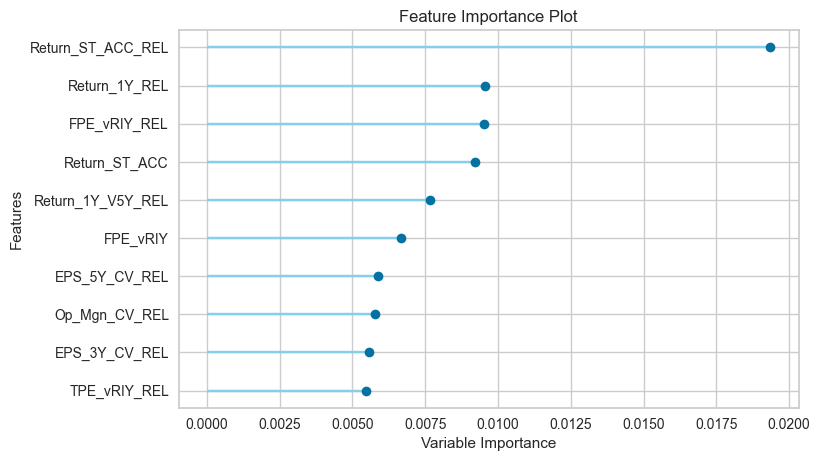

In [13]:
plot_model(et, plot = 'feature')

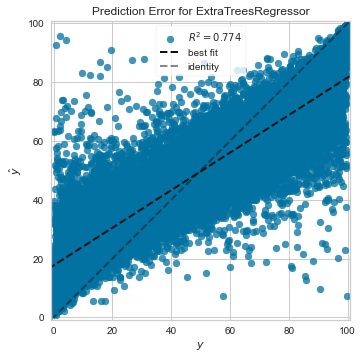

In [14]:
plot_model(et, plot = 'error')

In [15]:
df2 = df.loc[(df['St_Sc_2019'] <= 33.3)]

In [16]:
df3 = df2.loc[((df2['Year'] == 2016) | (df2['Year'] == 2015)) | (df2['Year'] == 2019) | (df2['Year'] == 2018) | (df2['Year'] == 2017)]

In [17]:
pe3c1 = df3.drop(columns=['FWD_Return_136M_Class',
                         'FWD_Return_1M_REL', 'FWD_Return_1M', 'FWD_Return_1M_Class',
                         'FWD_Return_3M_REL', 'FWD_Return_3M', 'FWD_Return_3M_Class',
                         'FWD_Return_6M_Class', 'FWD_Return_6M', 'FWD_Return_6M_REL',
                         'Date', 'Year', 'ticker', 'Mkt_Cap', 'Sub_Industry', 'Sector', 
                         'St_Sc_2021', 'St_Sc_2019', 'St_Sc_R_2021', 'St_Sc_R_2019',  
                         'FWD_EPS_3M','FWD_EPS_3M_REL', 'FWD_EPS_3M_REL_Decile',  'FWD_EPS_GR_3M_REV', 'FWD_EPS_GR_3M_REV_REL', 'FWD_EPS_GR_3M_REV_REL_Decile',
                         'FWD_REV_3M','FWD_REV_3M_REL', 'FWD_REV_3M_REL_Decile',  'FWD_REV_GR_3M_REV', 'FWD_REV_GR_3M_REV_REL', 'FWD_REV_GR_3M_REV_REL_Decile',
                         'FWD_FPE_3M_Rev', 'FWD_FPE_3M_Rev_REL_Decile', 
                         'FWD_DY_3M_Rev_REL', 'FWD_DY_3M_Rev', 'FWD_DY_3M_Rev_REL_Decile',
                         'FWD_EVS_3M_Rev_REL', 'FWD_EVS_3M_Rev', 'FWD_EVS_3M_Rev_REL_Decile',
                         'FWD_PB_3M_Rev_REL', 'FWD_PB_3M_Rev', 'FWD_PB_3M_Rev_REL_Decile'])

In [18]:
reg_experiment = setup(pe3c1, target = 'FWD_FPE_3M_Rev_REL', session_id=123, normalize = True)

,Description,Value
0,session_id,123
1,Target,FWD_FPE_3M_Rev_REL
2,Original Data,"(55854, 371)"
3,Missing Values,True
4,Numeric Features,364
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(29128, 389)"


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55854 entries, 84762 to 254929
Columns: 414 entries, Date to FPE
dtypes: float64(403), int64(7), object(4)
memory usage: 176.8+ MB


In [20]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,10.3384,178.4767,13.3577,0.7797,0.4790,0.5694,78.5170
rf,Random Forest Regressor,12.1230,225.2794,15.0074,0.7220,0.5397,0.6999,160.4550
catboost,CatBoost Regressor,13.0810,259.1494,16.0967,0.6801,0.5520,0.7133,39.7970
xgboost,Extreme Gradient Boosting,12.7717,262.5639,16.2003,0.6760,0.5414,0.6725,21.7350
knn,K Neighbors Regressor,11.8456,271.9050,16.4860,0.6644,0.5114,0.5949,19.5110
lightgbm,Light Gradient Boosting Machine,16.9983,403.8548,20.0950,0.5016,0.6692,1.0041,4.5310
dt,Decision Tree Regressor,14.8995,521.0444,22.8253,0.3568,0.6649,0.7069,3.7590
gbr,Gradient Boosting Regressor,21.5810,625.6556,25.0119,0.2278,0.7894,1.3707,52.4430
br,Bayesian Ridge,22.7494,713.1879,26.7047,0.1198,0.8170,1.4652,1.6250
ridge,Ridge Regression,22.5288,715.2624,26.7431,0.1170,0.8114,1.4294,0.1320


In [21]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.4619,180.3066,13.4278,0.7793,0.4758,0.5472
1,10.3201,173.9389,13.1886,0.7860,0.4673,0.5423
2,10.2097,173.8678,13.1859,0.7837,0.4771,0.5622
3,10.3956,183.2441,13.5368,0.7738,0.4813,0.5611
4,10.4498,181.2560,13.4631,0.7821,0.4987,0.6416
5,10.4697,186.0946,13.6416,0.7741,0.5119,0.6523
6,10.5388,185.9581,13.6366,0.7698,0.4678,0.5442
7,10.2709,179.1675,13.3853,0.7739,0.4620,0.5219
8,9.9802,167.1914,12.9303,0.7891,0.4680,0.5379
9,10.2873,173.7418,13.1811,0.7856,0.4806,0.5830


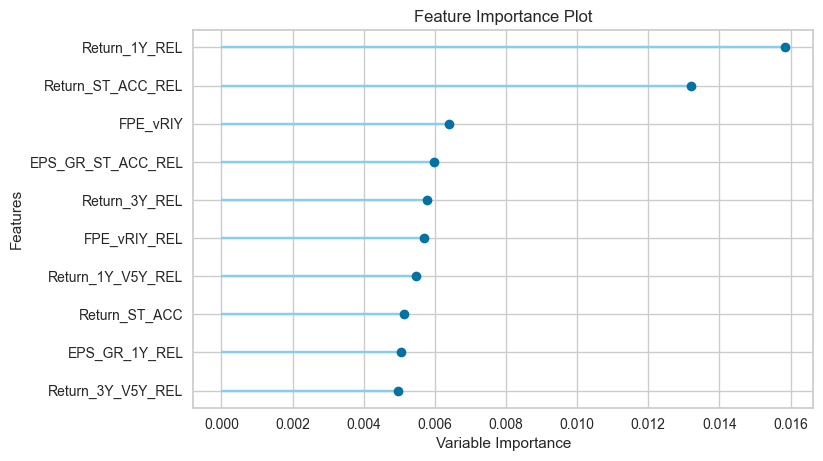

In [22]:
plot_model(et, plot = 'feature')

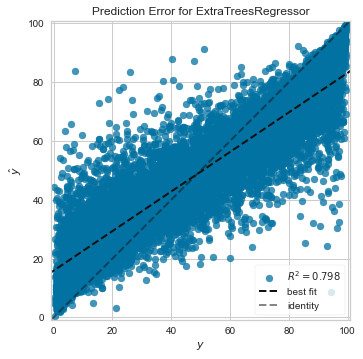

In [23]:
plot_model(et, plot = 'error')

### FWD_DY_3M_Rev_REL

In [24]:
dy3 = df1.drop(columns=['FWD_Return_136M_Class',
                         'FWD_Return_1M_REL', 'FWD_Return_1M', 'FWD_Return_1M_Class',
                         'FWD_Return_3M_REL', 'FWD_Return_3M', 'FWD_Return_3M_Class',
                         'FWD_Return_6M_Class', 'FWD_Return_6M', 'FWD_Return_6M_REL',
                         'Date', 'Year', 'ticker', 'Mkt_Cap', 'Sub_Industry', 'Sector', 
                         'St_Sc_2021', 'St_Sc_2019', 'St_Sc_R_2021', 'St_Sc_R_2019',  
                         'FWD_EPS_3M','FWD_EPS_3M_REL', 'FWD_EPS_3M_REL_Decile',  'FWD_EPS_GR_3M_REV', 'FWD_EPS_GR_3M_REV_REL', 'FWD_EPS_GR_3M_REV_REL_Decile',
                         'FWD_REV_3M','FWD_REV_3M_REL', 'FWD_REV_3M_REL_Decile',  'FWD_REV_GR_3M_REV', 'FWD_REV_GR_3M_REV_REL', 'FWD_REV_GR_3M_REV_REL_Decile',
                         'FWD_FPE_3M_Rev', 'FWD_FPE_3M_Rev_REL_Decile', 'FWD_FPE_3M_Rev_REL',
                          'FWD_DY_3M_Rev', 'FWD_DY_3M_Rev_REL_Decile',
                         'FWD_EVS_3M_Rev_REL', 'FWD_EVS_3M_Rev', 'FWD_EVS_3M_Rev_REL_Decile',
                         'FWD_PB_3M_Rev_REL', 'FWD_PB_3M_Rev', 'FWD_PB_3M_Rev_REL_Decile'])

In [25]:
reg_experiment = setup(dy3, target = 'FWD_DY_3M_Rev_REL', session_id=123, normalize = True,
                      remove_multicollinearity = True, multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,123
1,Target,FWD_DY_3M_Rev_REL
2,Original Data,"(170172, 371)"
3,Missing Values,True
4,Numeric Features,365
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(57398, 365)"


In [26]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.9326,146.2750,12.0931,0.8177,0.4514,0.6313,152.3900
rf,Random Forest Regressor,10.8322,193.7181,13.9175,0.7586,0.5232,0.8288,287.3820
knn,K Neighbors Regressor,10.7610,243.5057,15.6026,0.6965,0.4987,0.6882,74.1230
catboost,CatBoost Regressor,14.7458,319.7402,17.8806,0.6015,0.6162,1.0826,53.9980
xgboost,Extreme Gradient Boosting,14.5367,325.8147,18.0496,0.5940,0.6095,1.0512,48.1490
dt,Decision Tree Regressor,12.9967,440.4313,20.9849,0.4511,0.6082,0.7344,7.7710
lightgbm,Light Gradient Boosting Machine,18.8921,491.3743,22.1665,0.3876,0.7382,1.5182,5.8330
gbr,Gradient Boosting Regressor,22.4781,684.5285,26.1631,0.1470,0.8361,1.9856,107.8360
br,Bayesian Ridge,23.0469,734.4259,27.0999,0.0848,0.8527,2.1681,2.9530
ridge,Ridge Regression,22.9808,736.2622,27.1330,0.0825,0.8500,2.1386,0.2240


In [27]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.0351,148.7995,12.1983,0.8167,0.4638,0.6765
1,9.1550,154.7559,12.4401,0.8077,0.4657,0.6874
2,8.8551,145.5490,12.0644,0.8185,0.4558,0.6494
3,8.7305,139.3187,11.8033,0.8237,0.4462,0.6334
4,8.8918,143.1683,11.9653,0.8214,0.4667,0.7125
5,8.8202,140.9906,11.8739,0.8276,0.4418,0.5636
6,8.9769,150.2180,12.2563,0.8145,0.4607,0.6694
7,8.8771,144.1323,12.0055,0.8211,0.4402,0.5988
8,9.0839,147.6169,12.1498,0.8155,0.4401,0.5835
9,8.9004,148.2007,12.1738,0.8102,0.4329,0.5382


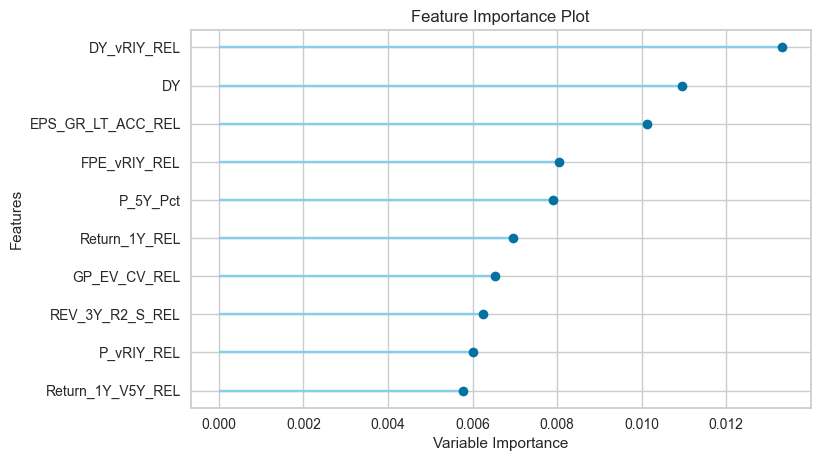

In [28]:
plot_model(et, plot = 'feature')

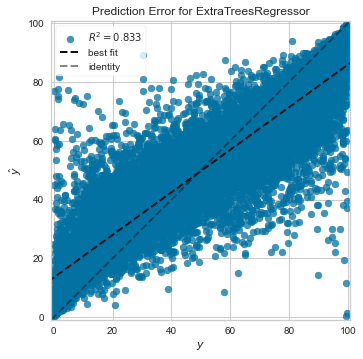

In [29]:
plot_model(et, plot = 'error')

### FWD_EVS_3M_Rev_REL

In [30]:
ev3 = df1.drop(columns=['FWD_Return_136M_Class',
                         'FWD_Return_1M_REL', 'FWD_Return_1M', 'FWD_Return_1M_Class',
                         'FWD_Return_3M_REL', 'FWD_Return_3M', 'FWD_Return_3M_Class',
                         'FWD_Return_6M_Class', 'FWD_Return_6M', 'FWD_Return_6M_REL',
                         'Date', 'Year', 'ticker', 'Mkt_Cap', 'Sub_Industry', 'Sector', 
                         'St_Sc_2021', 'St_Sc_2019', 'St_Sc_R_2021', 'St_Sc_R_2019',  
                         'FWD_EPS_3M','FWD_EPS_3M_REL', 'FWD_EPS_3M_REL_Decile',  'FWD_EPS_GR_3M_REV', 'FWD_EPS_GR_3M_REV_REL', 'FWD_EPS_GR_3M_REV_REL_Decile',
                         'FWD_REV_3M','FWD_REV_3M_REL', 'FWD_REV_3M_REL_Decile',  'FWD_REV_GR_3M_REV', 'FWD_REV_GR_3M_REV_REL', 'FWD_REV_GR_3M_REV_REL_Decile',
                         'FWD_FPE_3M_Rev', 'FWD_FPE_3M_Rev_REL_Decile', 'FWD_FPE_3M_Rev_REL',
                          'FWD_DY_3M_Rev', 'FWD_DY_3M_Rev_REL_Decile','FWD_DY_3M_Rev_REL',
                          'FWD_EVS_3M_Rev', 'FWD_EVS_3M_Rev_REL_Decile',
                         'FWD_PB_3M_Rev_REL', 'FWD_PB_3M_Rev', 'FWD_PB_3M_Rev_REL_Decile'])

In [31]:
reg_experiment = setup(ev3, target = 'FWD_EVS_3M_Rev_REL', session_id=123, normalize = True,
                      remove_multicollinearity = True, multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,123
1,Target,FWD_EVS_3M_Rev_REL
2,Original Data,"(170172, 371)"
3,Missing Values,True
4,Numeric Features,365
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69406, 371)"


In [32]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,10.4251,199.5242,14.1243,0.7671,0.5185,0.7629,195.2240
rf,Random Forest Regressor,12.3965,248.3826,15.7593,0.7101,0.5881,0.9663,420.4500
knn,K Neighbors Regressor,11.8058,297.4449,17.2460,0.6528,0.5490,0.8129,115.3880
catboost,CatBoost Regressor,16.5538,396.2299,19.9048,0.5375,0.6855,1.2349,59.4520
xgboost,Extreme Gradient Boosting,16.1873,398.4270,19.9597,0.5350,0.6737,1.1734,60.0470
dt,Decision Tree Regressor,14.5624,566.2797,23.7921,0.3390,0.6930,0.8768,9.2090
lightgbm,Light Gradient Boosting Machine,20.5685,572.5852,23.9285,0.3317,0.7993,1.6720,6.8020
gbr,Gradient Boosting Regressor,23.5851,741.1947,27.2247,0.1349,0.8790,2.0554,146.4580
br,Bayesian Ridge,24.0236,785.2150,28.0214,0.0835,0.8890,2.0807,4.0670
omp,Orthogonal Matching Pursuit,24.3230,799.1950,28.2698,0.0672,0.8966,2.1486,0.2960


In [33]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.5810,204.4693,14.2993,0.7611,0.5182,0.7337
1,10.5100,206.4700,14.3691,0.7572,0.5265,0.7935
2,10.3526,195.8208,13.9936,0.7710,0.5169,0.7543
3,10.4463,199.9976,14.1421,0.7630,0.5075,0.7311
4,10.4016,198.0464,14.0729,0.7686,0.5161,0.7435
5,10.2222,191.6820,13.8449,0.7789,0.5182,0.7795
6,10.4844,200.8458,14.1720,0.7669,0.5179,0.7639
7,10.3241,193.4864,13.9099,0.7743,0.5127,0.7023
8,10.5797,205.2675,14.3272,0.7631,0.5196,0.8586
9,10.3488,199.1557,14.1123,0.7669,0.5319,0.7685


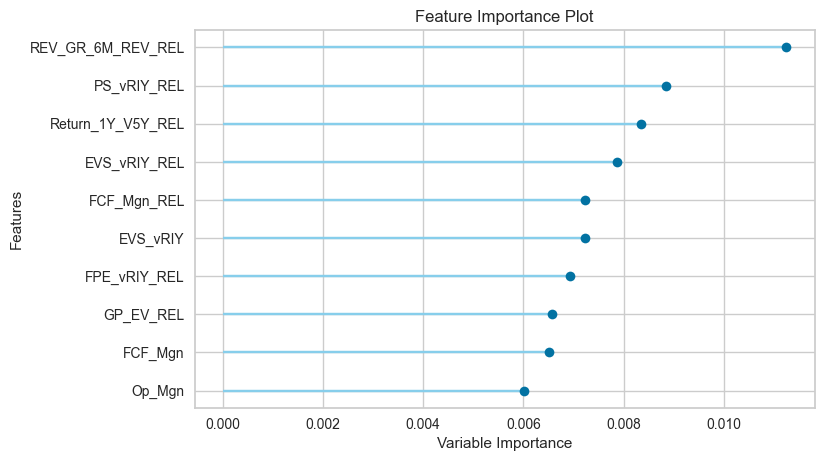

In [34]:
plot_model(et, plot = 'feature')

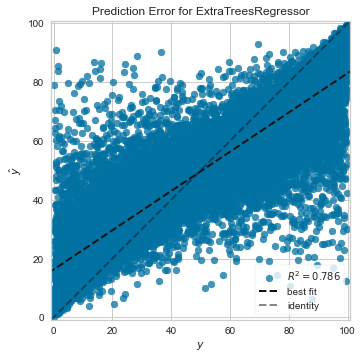

In [35]:
plot_model(et, plot = 'error')

### FWD_PB_3M_Rev_REL

In [36]:
pb3 = df1.drop(columns=['FWD_Return_136M_Class',
                         'FWD_Return_1M_REL', 'FWD_Return_1M', 'FWD_Return_1M_Class',
                         'FWD_Return_3M_REL', 'FWD_Return_3M', 'FWD_Return_3M_Class',
                         'FWD_Return_6M_Class', 'FWD_Return_6M', 'FWD_Return_6M_REL',
                         'Date', 'Year', 'ticker', 'Mkt_Cap', 'Sub_Industry', 'Sector', 
                         'St_Sc_2021', 'St_Sc_2019', 'St_Sc_R_2021', 'St_Sc_R_2019',  
                         'FWD_EPS_3M','FWD_EPS_3M_REL', 'FWD_EPS_3M_REL_Decile',  'FWD_EPS_GR_3M_REV', 'FWD_EPS_GR_3M_REV_REL', 'FWD_EPS_GR_3M_REV_REL_Decile',
                         'FWD_REV_3M','FWD_REV_3M_REL', 'FWD_REV_3M_REL_Decile',  'FWD_REV_GR_3M_REV', 'FWD_REV_GR_3M_REV_REL', 'FWD_REV_GR_3M_REV_REL_Decile',
                         'FWD_FPE_3M_Rev', 'FWD_FPE_3M_Rev_REL_Decile', 'FWD_FPE_3M_Rev_REL',
                          'FWD_DY_3M_Rev', 'FWD_DY_3M_Rev_REL_Decile','FWD_DY_3M_Rev_REL',
                          'FWD_EVS_3M_Rev', 'FWD_EVS_3M_Rev_REL_Decile','FWD_EVS_3M_Rev_REL',
                          'FWD_PB_3M_Rev', 'FWD_PB_3M_Rev_REL_Decile'])

In [37]:
reg_experiment = setup(pb3, target = 'FWD_PB_3M_Rev_REL', session_id=123, normalize = True,
                      remove_multicollinearity = True, multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,123
1,Target,FWD_PB_3M_Rev_REL
2,Original Data,"(170172, 371)"
3,Missing Values,True
4,Numeric Features,365
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(67717, 368)"


In [38]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,9.8179,183.7307,13.5536,0.7909,0.5236,0.8945,191.5970
rf,Random Forest Regressor,11.8504,230.6825,15.1874,0.7375,0.5999,1.1640,446.7260
knn,K Neighbors Regressor,10.7953,271.8591,16.4871,0.6906,0.5295,0.8166,101.9620
xgboost,Extreme Gradient Boosting,15.8474,385.4097,19.6307,0.5614,0.6975,1.4689,55.0460
catboost,CatBoost Regressor,16.3457,389.0475,19.7231,0.5572,0.7116,1.5310,57.6930
dt,Decision Tree Regressor,13.6144,543.5880,23.3088,0.3814,0.6846,0.9838,9.7830
lightgbm,Light Gradient Boosting Machine,20.8319,585.5213,24.1972,0.3336,0.8396,2.1719,5.9550
gbr,Gradient Boosting Regressor,24.0744,773.8181,27.8172,0.1193,0.9293,2.8037,130.8090
br,Bayesian Ridge,24.6550,828.2681,28.7791,0.0573,0.9482,3.0216,3.8510
omp,Orthogonal Matching Pursuit,24.9116,839.3055,28.9702,0.0448,0.9545,3.0558,0.2870


In [39]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.6288,175.3502,13.2420,0.7991,0.5103,0.8231
1,9.7928,185.9901,13.6378,0.7899,0.5282,0.9681
2,9.7189,180.8813,13.4492,0.7954,0.5240,0.8884
3,9.7800,181.4336,13.4697,0.7934,0.5083,0.7947
4,9.9080,187.1815,13.6814,0.7860,0.5265,1.0282
5,9.7080,177.3084,13.3157,0.7998,0.5296,0.8942
6,9.8248,186.5844,13.6596,0.7860,0.5396,0.9656
7,9.8737,182.4361,13.5069,0.7891,0.5086,0.8055
8,9.9890,189.5738,13.7686,0.7872,0.5287,0.8856
9,9.9546,190.5679,13.8046,0.7828,0.5326,0.8919


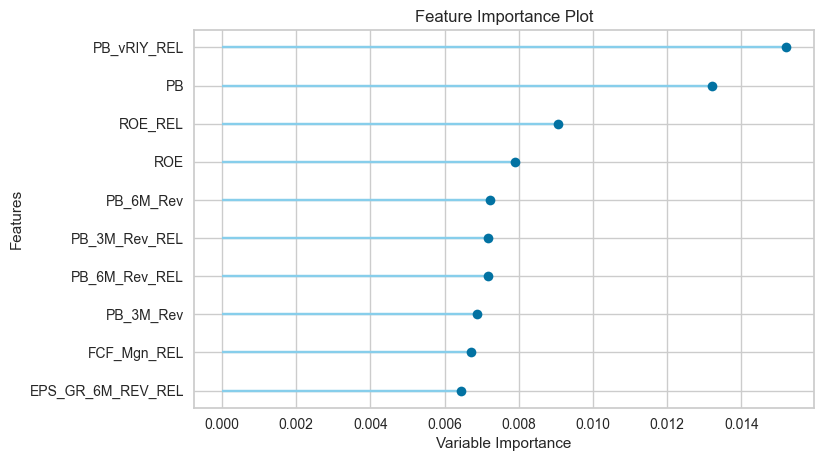

In [40]:
plot_model(et, plot = 'feature')

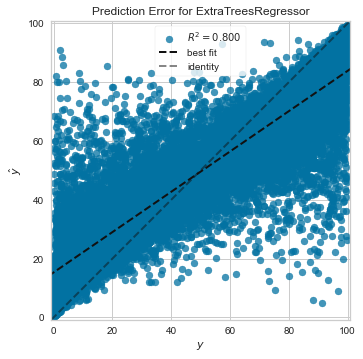

In [41]:
plot_model(et, plot = 'error')